In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [215]:
score=pd.read_csv(r'C:\KDT\프로젝트\0822 위스키\userratings_raw_xx.csv')

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\3856505523.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  score=pd.read_csv(r'C:\KDT\프로젝트\0822 위스키\userratings_raw_xx.csv')


In [216]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322782 entries, 0 to 322781
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Whisky          322782 non-null  object
 1   Age             322782 non-null  object
 2   Alc%            322463 non-null  object
 3   Volume          322782 non-null  object
 4   No. of Bottles  322782 non-null  object
 5   Cask Number     322782 non-null  object
 6   Votes           322782 non-null  object
 7   Avg. Rating     322782 non-null  object
 8   User Rating     322782 non-null  object
 9   user            322782 non-null  object
dtypes: object(10)
memory usage: 24.6+ MB


In [217]:
score.head()

,Whisky,Age,Alc%,Volume,No. of Bottles,Cask Number,Votes,Avg. Rating,User Rating,user
0,Laphroaig 21-year-old Friends of Laphroaig,21,48.4 % Vol.,350 ml,-,-,458,90.07,93,wsp
1,Miltonduff 1978 CA Authentic Collection,39,44.6 % Vol.,700 ml,204,-,75,90.3,92,wsp
2,Springbank 2001 BA Blackadder Statement Editio...,17,58.5 % Vol.,700 ml,96,130,22,92.6,92,wsp
3,Glendronach 25-year-old Grandeur,25,50.6 % Vol.,700 ml,1180,Batch 7,94,90.79,92,wsp
4,Lagavulin 16-year-old White Horse Distillers,16,43.0 % Vol.,700 ml,-,-,592,89.73,92,wsp


In [218]:
american = score[score['Whisky'].str.contains('Wild Turkey|Jim Beam|Jack Daniel|Booker|Maker', case=False, na=False)]
american

,Whisky,Age,Alc%,Volume,No. of Bottles,Cask Number,Votes,Avg. Rating,User Rating,user
95,Booker's 06 + 1 month 127.7 Proof,6,63.85 % Vol.,700 ml,-,Batch 2016-01E,30,86.64,90,wsp
278,Jack Daniel's Master Distiller Series No. 2 – ...,-,43.0 % Vol.,700 ml,-,-,20,77.83,80,wsp
341,Jim Beam 15-year-old Lineage,15,55.5 % Vol.,700 ml,-,Batch 1,9,90.57,90,mapl
398,Maker's 46 Red Wax,-,47.0 % Vol.,700 ml,-,-,106,81.38,89,mapl
441,Wild Turkey Kentucky Spirit Single Barrel,-,50.5 % Vol.,750 ml,-,443,6,87,88,mapl
...,...,...,...,...,...,...,...,...,...,...
318893,Jack Daniel's Old No. 7,-,40.0 % Vol.,350 ml,-,-,6,59.5,69,robain
318906,Jim Beam White Label,-,40.0 % Vol.,350 ml,-,-,3,61.33,65,robain
318909,Jim Beam White Label,4,40.0 % Vol.,750 ml,-,-,310,61.97,63,robain
319902,Booker's 07 + 1 month 128.9 Proof,7,64.45 % Vol.,750 ml,-,Batch C06-B-15,7,82.33,89,owarsharif


In [219]:
american.drop(columns='No. of Bottles',inplace=True)
american.drop(columns='Cask Number',inplace=True)

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\2153852343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.drop(columns='No. of Bottles',inplace=True)
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\2153852343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.drop(columns='Cask Number',inplace=True)


In [220]:

for row in american.index:
    if 'proof' in str(american.loc[row,'Alc%']):
        american.drop(index=row,inplace=True)
    else:
        american.loc[row,'Alc%']=float(str(american.loc[row,'Alc%']).strip('% Vol.'))
        american.loc[row,'Volume']=float(str(american.loc[row,'Volume']).strip('ml'))
american

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\1886778915.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.loc[row,'Alc%']=float(str(american.loc[row,'Alc%']).strip('% Vol.'))
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\1886778915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american.loc[row,'Volume']=float(str(american.loc[row,'Volume']).strip('ml'))
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\1886778915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Whisky,Age,Alc%,Volume,Votes,Avg. Rating,User Rating,user
95,Booker's 06 + 1 month 127.7 Proof,6,63.85,700.0,30,86.64,90,wsp
278,Jack Daniel's Master Distiller Series No. 2 – ...,-,43.0,700.0,20,77.83,80,wsp
341,Jim Beam 15-year-old Lineage,15,55.5,700.0,9,90.57,90,mapl
398,Maker's 46 Red Wax,-,47.0,700.0,106,81.38,89,mapl
441,Wild Turkey Kentucky Spirit Single Barrel,-,50.5,750.0,6,87,88,mapl
...,...,...,...,...,...,...,...,...
318893,Jack Daniel's Old No. 7,-,40.0,350.0,6,59.5,69,robain
318906,Jim Beam White Label,-,40.0,350.0,3,61.33,65,robain
318909,Jim Beam White Label,4,40.0,750.0,310,61.97,63,robain
319902,Booker's 07 + 1 month 128.9 Proof,7,64.45,750.0,7,82.33,89,owarsharif


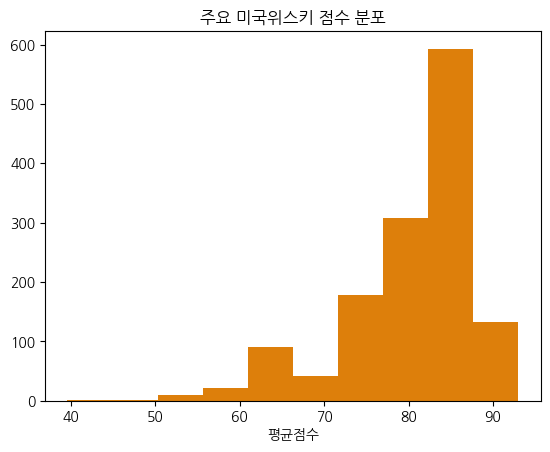

In [244]:
plt.hist(pd.Series(american['Avg. Rating'],dtype='float'),color='#dd7f0b')
plt.title('주요 미국위스키 점수 분포')
plt.xlabel('평균점수')
plt.show()

In [242]:
pd.Series(american['Avg. Rating'],dtype='float').mean()

80.42701308139536

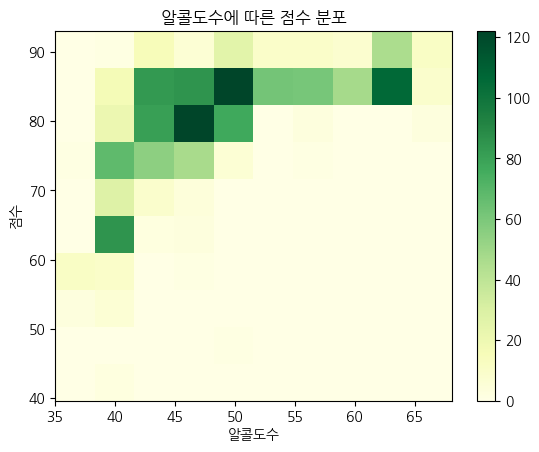

In [245]:
plt.hist2d(american['Alc%'],pd.Series(american['Avg. Rating'],dtype='float'),cmap='YlGn')
plt.xlabel('알콜도수')
plt.ylabel('점수')
plt.title('알콜도수에 따른 점수 분포')
plt.colorbar()
plt.show()

0.6465831288002836

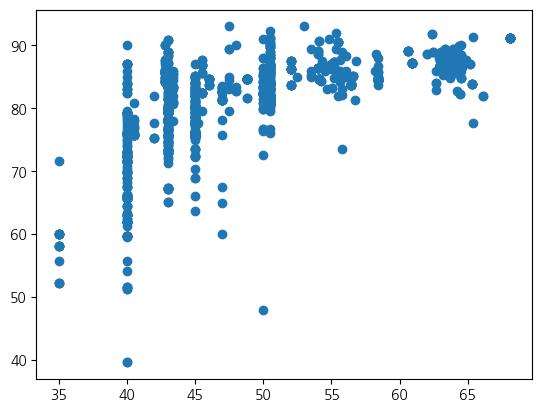

In [246]:
plt.scatter(american['Alc%'],pd.Series(american['Avg. Rating'],dtype='float'))
np.corrcoef(pd.Series(american['Alc%'],dtype='float'),pd.Series(american['Avg. Rating'],dtype='float'))[0,1]

array([[ 1.        , -0.39638897],
       [-0.39638897,  1.        ]])

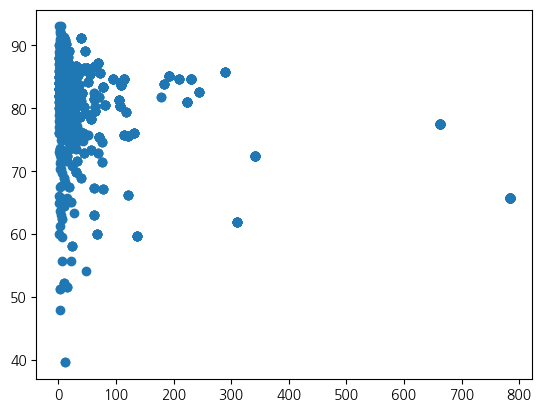

In [224]:
plt.scatter(pd.Series(american['Votes'],dtype='float'),pd.Series(american['Avg. Rating'],dtype='float'))
np.corrcoef(pd.Series(american['Votes'],dtype='float'),pd.Series(american['Avg. Rating'],dtype='float'))

In [225]:
american['Age'].replace('-',np.nan,inplace=True)
american2=american.dropna(subset='Age')


C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\1518274690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  american['Age'].replace('-',np.nan,inplace=True)
C:\Users\KDP-30\AppData\Local\Temp\ipykernel_16008\1518274690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  american['Age'].replace('-',np.nan,inplace=True)


In [226]:
american2

,Whisky,Age,Alc%,Volume,Votes,Avg. Rating,User Rating,user
95,Booker's 06 + 1 month 127.7 Proof,6,63.85,700.0,30,86.64,90,wsp
341,Jim Beam 15-year-old Lineage,15,55.5,700.0,9,90.57,90,mapl
472,Booker's 06 + 3 months 127.4 Proof,6,63.7,700.0,4,88.75,88,mapl
3153,Wild Turkey 13-year-old Distiller's Reserve,13,45.5,700.0,41,82.47,81,jel
4765,Booker's 07 + 3 months 126.5 Proof,7,63.25,700.0,6,86.75,89,psyk0man
...,...,...,...,...,...,...,...,...
314679,Wild Turkey Master’s Keep - Decades,10,52.0,750.0,41,86.28,85,karpaff
315404,Booker's 07 + 2 months + 5 days 127.4 Proof,7,63.7,700.0,192,85.18,70,erikz
318309,Booker's 07 + 2 months + 5 days 127.4 Proof,7,63.7,700.0,192,85.18,89,robain
318909,Jim Beam White Label,4,40.0,750.0,310,61.97,63,robain


0.35203140720129017

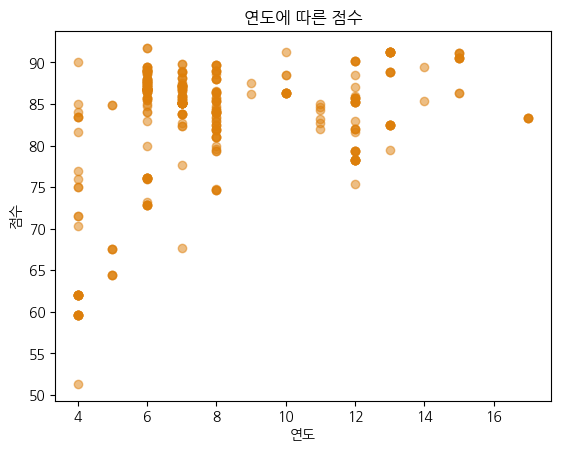

In [260]:
plt.scatter(pd.Series(american2['Age'],dtype=float),pd.Series(american2['Avg. Rating'],dtype=float),alpha=0.5,color='#dd7f0b')
plt.xlabel('연도')
plt.ylabel('점수')
plt.title('연도에 따른 점수')
np.corrcoef(pd.Series(american2['Age'],dtype=float),pd.Series(american2['Avg. Rating'],dtype=float))[0,1]

0.35203140720129017

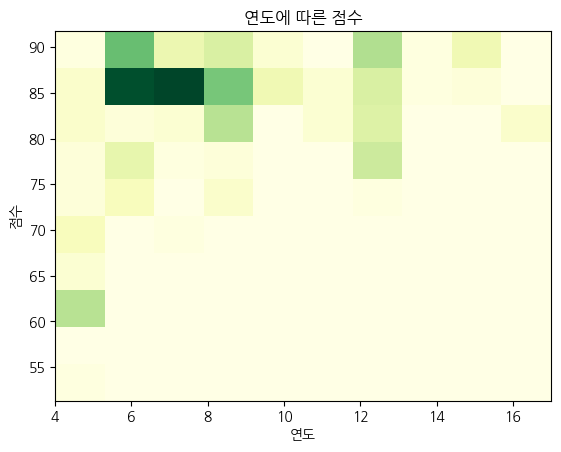

In [256]:
plt.hist2d(pd.Series(american2['Age'],dtype=float),pd.Series(american2['Avg. Rating'],dtype=float),cmap='YlGn')
plt.xlabel('연도')
plt.ylabel('점수')
plt.title('연도에 따른 점수')
np.corrcoef(pd.Series(american2['Age'],dtype=float),pd.Series(american2['Avg. Rating'],dtype=float))[0,1]

-0.14968042429528572

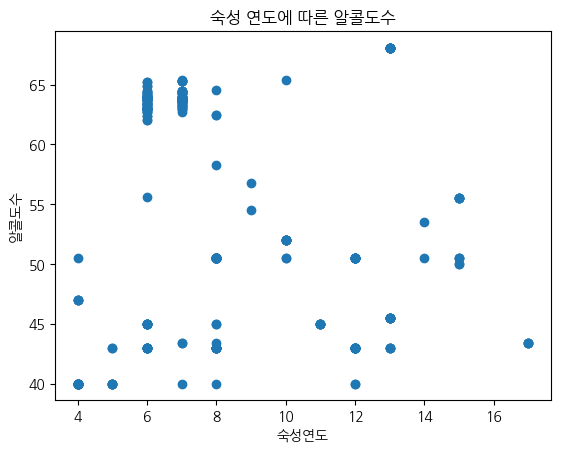

In [252]:
plt.scatter(pd.Series(american2['Age'],dtype=float),pd.Series(american2['Alc%'],dtype=float))

plt.title('숙성 연도에 따른 알콜도수')
plt.xlabel('숙성연도')
plt.ylabel('알콜도수')
np.corrcoef(pd.Series(american2['Age'],dtype=float),pd.Series(american2['Alc%'],dtype=float))[0,1]

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = american2[['Age','Votes', 'Alc%']]
y = american2['Avg. Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Absolute Error (MAE): 2.64
Mean Squared Error (MSE): 12.64
R² Score: 0.74
